In [1]:
#importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
# Creating graph 
graph = nx.DiGraph()
number_of_nodes = range(1, 11)
graph.add_nodes_from(number_of_nodes)

In [3]:
edges = [(1,2),[2,3],[3,4],[1,7],[1,5],[2,5],[3,6],[4,6],[4,10],[5,7],[5,8],[6,9],[6,10],[7,8],[8,9],[9,10], 
         (2,1),(3,2),(4,3),(7,1),(5,1),(5,2),(6,3),(6,4),(10,4),(7,5),(8,5),(9,6),(10,6),(8,7),(9,8),(10,9)]

In [4]:
# Adding the edges to the nodes 
graph.add_edges_from(edges)

In [5]:
# Adding weights to the ICM graph
for u,v in graph.edges():
    weight = 1/(graph.degree(v))
    graph[u][v]['weight'] = weight

In [6]:
graph.edges.data()

OutEdgeDataView([(1, 2, {'weight': 0.16666666666666666}), (1, 7, {'weight': 0.16666666666666666}), (1, 5, {'weight': 0.125}), (2, 3, {'weight': 0.16666666666666666}), (2, 5, {'weight': 0.125}), (2, 1, {'weight': 0.16666666666666666}), (3, 4, {'weight': 0.16666666666666666}), (3, 6, {'weight': 0.125}), (3, 2, {'weight': 0.16666666666666666}), (4, 6, {'weight': 0.125}), (4, 10, {'weight': 0.16666666666666666}), (4, 3, {'weight': 0.16666666666666666}), (5, 7, {'weight': 0.16666666666666666}), (5, 8, {'weight': 0.16666666666666666}), (5, 1, {'weight': 0.16666666666666666}), (5, 2, {'weight': 0.16666666666666666}), (6, 9, {'weight': 0.16666666666666666}), (6, 10, {'weight': 0.16666666666666666}), (6, 3, {'weight': 0.16666666666666666}), (6, 4, {'weight': 0.16666666666666666}), (7, 8, {'weight': 0.16666666666666666}), (7, 1, {'weight': 0.16666666666666666}), (7, 5, {'weight': 0.125}), (8, 9, {'weight': 0.16666666666666666}), (8, 5, {'weight': 0.125}), (8, 7, {'weight': 0.16666666666666666}),

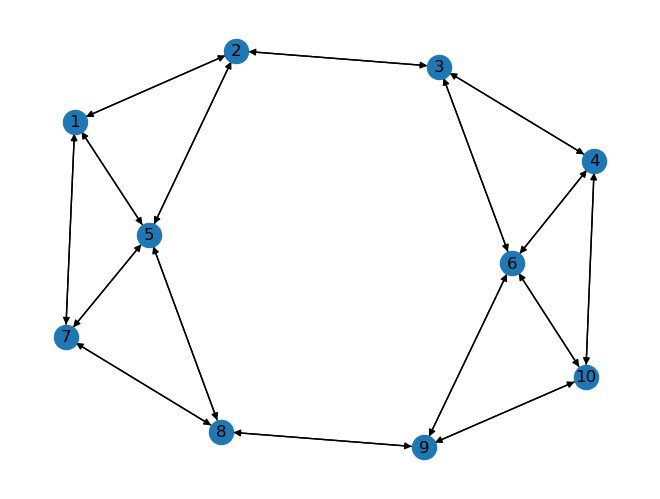

In [7]:
# Drawing the original graph
nx.draw(graph, with_labels=True)
plt.show()

Now, we are going to run the greedy algorithm to find the influence maximization for k <= 3. We are randomly going to flip the weights. If the random weight is less than the weight (probability), we can say the edge exist. We will then run the greedy algorithm for all instances of the generated network and find the average number of nodes each one can cover.

In [25]:
# Function to generate the graphs with random weights
def sample_w_icm(g, num_of_networks):
    gen_nets = []
    for n in range(num_of_networks):
        h = nx.Graph()
        h.add_nodes_from(g.nodes())
        for u,v in g.edges():
            if random.random() < g[u][v]['weight']:
                h.add_edge(u,v)
        gen_nets.append(h)
    return gen_nets

In [26]:
# Generating 100000 networks for out base network
num_nets = 10000
net_list = sample_w_icm(graph, num_nets)
net_list[0:10] 

In [27]:
net_list[1000].nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [28]:
net_list[1000].edges()

EdgeView([(1, 2), (1, 5), (1, 7), (4, 10), (5, 8), (6, 10), (7, 8)])

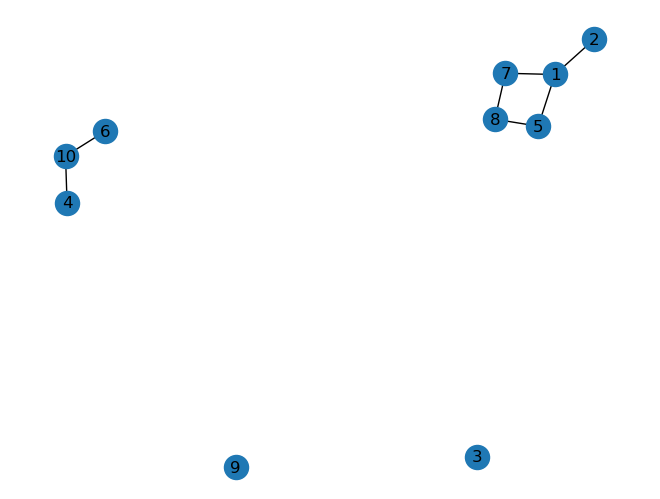

In [29]:
nx.draw(net_list[1000], with_labels=True)
plt.show()

In [13]:
# Greedy Algorithm
def average_coverage(g, lst):
    A = set()
    node_list = list(g.nodes)
    final_list_of_sets = []
    
    for node in g.nodes:
        sampled_list = []
        for network in lst:
            x = ()
            x = set(nx.shortest_path(network, node))   #Find the influenced for a node in each of the samples
            sampled_list.append(x)
 
        sorted_sampled_list = sorted(sampled_list)
        print(sorted_sampled_list[9000:10000])
        final_list_of_sets.append(sorted_sampled_list[int(num_nets/2)])
    
    return final_list_of_sets
        

In [14]:
final_list = average_coverage(graph, net_list)

[{1, 5, 7, 8, 9}, {1, 2}, {1, 2, 3, 4, 5, 6, 7, 8}, {8, 1, 9, 7}, {1, 2}, {1, 2, 5, 7, 8}, {1, 2, 3, 4, 5, 9, 10}, {1, 2, 5, 7}, {1, 2, 5, 7}, {1, 2, 5, 7, 8}, {1, 5, 7, 8, 9, 10}, {1, 2}, {1, 2, 3, 4, 6, 9, 10}, {1, 2, 3, 6, 7, 8, 9, 10}, {1, 5}, {8, 1, 5, 9}, {8, 1, 5, 7}, {1, 3, 4, 5, 6, 7, 8, 9, 10}, {1, 2, 3, 4, 6, 7}, {1, 5, 6, 7, 8, 9}, {1, 2}, {1, 2}, {1, 2}, {1, 5, 7}, {1, 2}, {1, 2}, {1, 2, 5}, {1, 2, 5, 7}, {1, 2, 3}, {1, 2, 3}, {1, 2, 3, 5}, {1, 2, 7}, {1, 2, 3, 5, 7}, {8, 1, 5}, {8, 1, 5, 7}, {1, 2}, {1, 5}, {1, 2, 5}, {1, 7}, {1, 2}, {1, 5}, {1, 2}, {1, 5, 7}, {1, 5, 7}, {1, 2, 5, 7}, {8, 1, 5}, {8, 1, 5}, {1, 7}, {1, 5, 7}, {1, 2, 5, 7}, {8, 1, 5, 7}, {8, 1, 5, 7}, {1, 2, 5, 7, 8}, {1, 2, 3}, {1, 2, 3, 5, 8}, {8, 1, 5, 7}, {1, 2, 5, 7}, {1, 2, 3}, {8, 1, 5}, {1, 7}, {1, 5}, {1, 5}, {1, 5}, {8, 1, 5, 7}, {1, 2}, {1, 2}, {8, 1, 5}, {1, 2}, {1, 2}, {1, 2}, {1, 2}, {1, 2, 5}, {8, 1, 2, 5}, {1, 7}, {1, 7}, {1, 2, 7}, {8, 1, 5}, {1, 7}, {1, 5}, {1, 7}, {1, 5}, {1, 7}, {1, 7}, 

[{9, 6}, {9, 10, 4, 6}, {3, 6, 8, 9, 10}, {9, 10, 4, 6}, {3, 6}, {1, 2, 3, 5, 6, 7}, {10, 3, 6}, {9, 3, 6}, {10, 3, 4, 6}, {2, 3, 6}, {10, 6}, {4, 6}, {9, 10, 6}, {4, 6}, {4, 6}, {4, 6}, {10, 4, 6}, {2, 3, 4, 5, 6}, {9, 6}, {3, 4, 6}, {9, 6}, {9, 10, 6}, {9, 3, 6}, {9, 4, 6}, {8, 9, 6}, {3, 6}, {4, 6}, {4, 6}, {4, 6}, {3, 4, 6}, {3, 4, 6}, {10, 6}, {10, 6}, {9, 6}, {10, 6}, {9, 10, 6}, {4, 6}, {9, 10, 4, 6}, {9, 10, 4, 6}, {3, 6}, {10, 3, 6}, {4, 6}, {3, 4, 6}, {3, 4, 6}, {3, 4, 6, 9, 10}, {2, 3, 6}, {2, 3, 4, 6, 10}, {9, 4, 6}, {9, 10, 4, 6}, {10, 3, 4, 6}, {2, 3, 4, 6, 9, 10}, {2, 3, 5, 6, 10}, {9, 10, 3, 6}, {2, 3, 4, 6, 9, 10}, {2, 3, 4, 5, 6, 9, 10}, {4, 6, 8, 9, 10}, {3, 6}, {3, 4, 6}, {3, 4, 6}, {9, 10, 6}, {4, 6, 8, 9, 10}, {3, 6}, {10, 3, 6}, {3, 4, 6}, {9, 10, 3, 6}, {10, 4, 6}, {3, 4, 6, 8, 9, 10}, {2, 3, 4, 6, 8, 9}, {3, 4, 6, 8, 9, 10}, {2, 3, 4, 6, 8, 9, 10}, {2, 3, 4, 5, 6, 8, 9, 10}, {1, 2, 3, 4, 5, 6, 7, 8}, {1, 2, 6, 7, 8, 9, 10}, {1, 4, 5, 6, 8, 9, 10}, {3, 4, 6}, {1

[{1, 2},
 {1, 2},
 {3, 4, 6, 10},
 {3, 4, 6, 10},
 {1, 2, 3, 5, 6},
 {4, 6, 10},
 {5, 6, 7, 8, 9, 10},
 {7, 8},
 {6, 8, 9, 10},
 {3, 6, 10}]